In [74]:
import nibabel as nib
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy

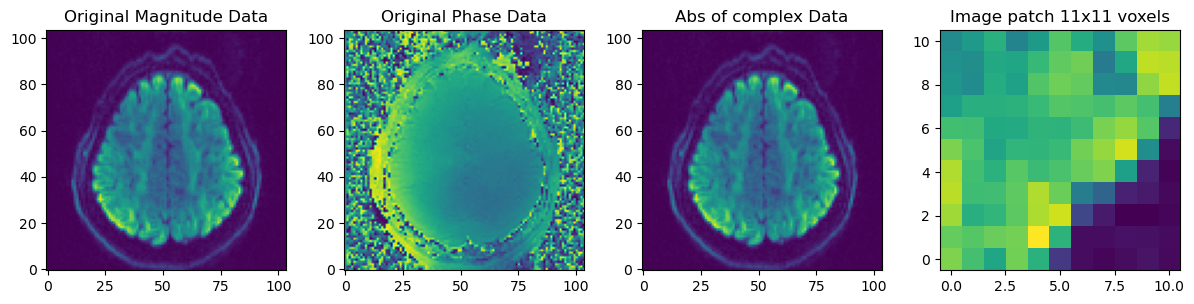

In [85]:
img_path = '/home/pabaua/dev_mni/data/test_nordic/sub-01_ses-2mm_dir-AP_run-01_part-mag_dwi.nii.gz'
img_phase_path = '/home/pabaua/dev_mni/data/test_nordic/sub-01_ses-2mm_dir-AP_run-01_part-phase_dwi.nii.gz'
img_data = nib.load(img_path).get_fdata()
img_phase_data = nib.load(img_phase_path).get_fdata()
img_complex_data = img_data[:,:,:,:] * np.exp(1j * img_phase_data[:,:,:,:])

fig, axs = plt.subplots(1, 4, figsize=(12, 4))
axs[0].imshow(img_data[:,:,50,1].T, origin='lower')
axs[0].set_title('Original Magnitude Data')
axs[1].imshow(img_phase_data[:,:,50,1].T, origin='lower')
axs[1].set_title('Original Phase Data')
axs[2].imshow(np.abs(img_complex_data)[:,:,50,1].T, origin='lower')
axs[2].set_title('Abs of complex Data')
axs[3].imshow(img_data[70:81, 19:30,50,1].T, origin='lower')
axs[3].set_title('Image patch 11x11 voxels')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

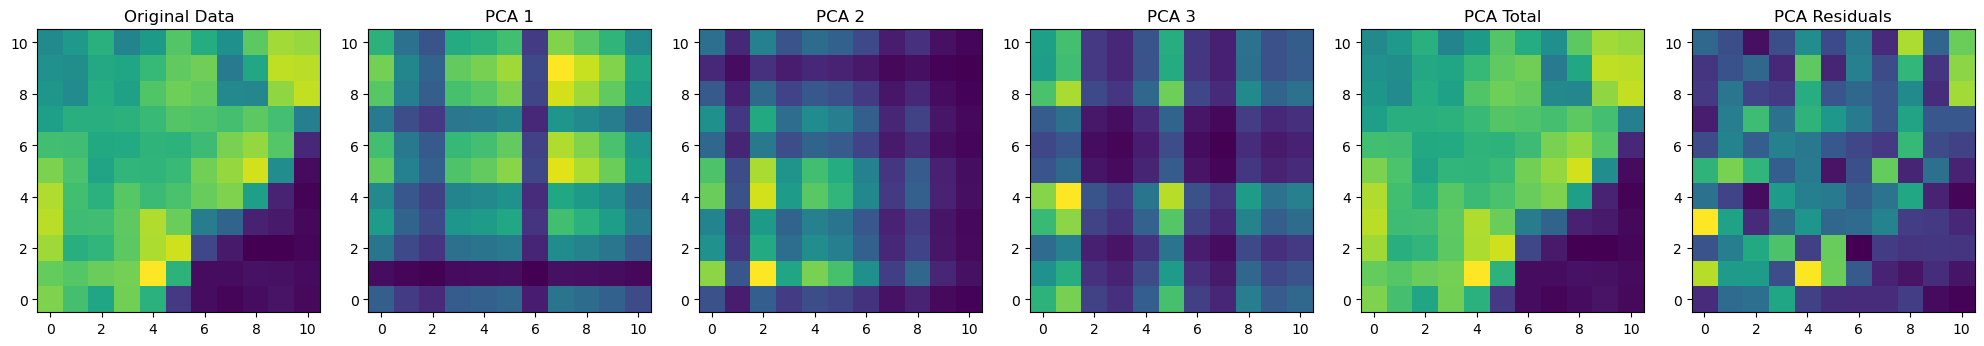

In [83]:
# Compute SVD
U, S, Vt = scipy.linalg.svd(img_complex_data[70:81, 19:30,50,1])

fig, axs = plt.subplots(1, 6, figsize=(20, 4))

# Plot original data
axs[0].imshow(np.abs(img_complex_data[70:81, 19:30, 50, 1]).T, origin='lower')
axs[0].set_title('Original Data')

# Plot PCA_1
PCA_1 = np.abs(np.dot(U[:, :1] * S[:1], Vt[:1, :]))
axs[1].imshow(PCA_1.T, origin='lower')
axs[1].set_title('PCA 1')

# Plot PCA_2
PCA_2 = np.abs(np.dot(U[:, 1:2] * S[1:2], Vt[1:2, :]))
axs[2].imshow(PCA_2.T, origin='lower')
axs[2].set_title('PCA 2')

# Plot PCA_3
PCA_3 = np.abs(np.dot(U[:, 2:3] * S[2:3], Vt[2:3, :]))
axs[3].imshow(PCA_3.T, origin='lower')
axs[3].set_title('PCA 3')

# Plot PCA_total
PCA_tot = np.abs(np.dot(U[:, :11] * S[:11], Vt[:11, :]))
axs[4].imshow(PCA_tot.T, origin='lower')
axs[4].set_title('PCA Total')

# Plot PCA_residuals
PCA_residuals = np.abs(np.sqrt((img_data[70:81, 19:30, 50, 1] - np.dot(U[:, :3] * S[:3], Vt[:3, :])) ** 2))
axs[5].imshow(PCA_residuals.T, origin='lower')
axs[5].set_title('PCA Residuals')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
